In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'imblearn'

In [14]:
df= pd.read_csv('CVD_cleaned.csv')

In [15]:
df.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [20]:
str(df)

'       General_Health                  Checkup Exercise Heart_Disease  \\\n0                Poor  Within the past 2 years       No            No   \n1           Very Good     Within the past year       No           Yes   \n2           Very Good     Within the past year      Yes            No   \n3                Poor     Within the past year      Yes           Yes   \n4                Good     Within the past year       No            No   \n...               ...                      ...      ...           ...   \n308849      Very Good     Within the past year      Yes            No   \n308850           Fair  Within the past 5 years      Yes            No   \n308851      Very Good      5 or more years ago      Yes            No   \n308852      Very Good     Within the past year      Yes            No   \n308853      Excellent     Within the past year      Yes            No   \n\n       Skin_Cancer Other_Cancer Depression  \\\n0               No           No         No   \n1            

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [24]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


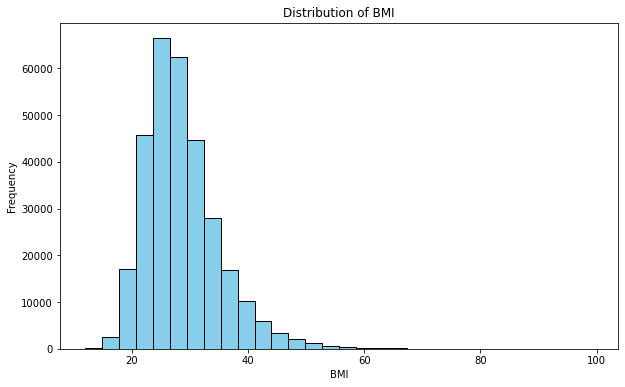

In [25]:
#histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

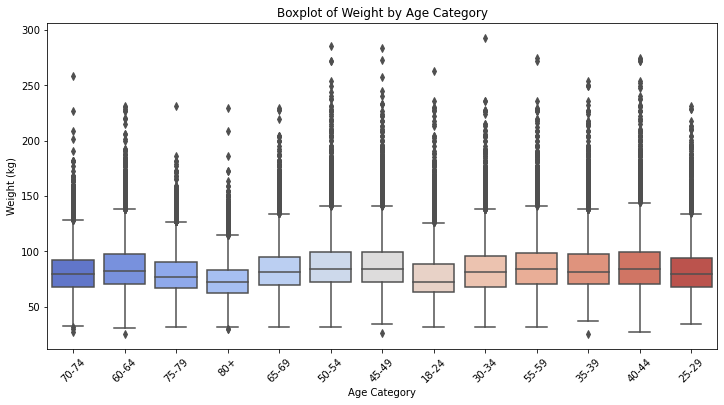

In [28]:
#boxplot for Age_category and Weight_(kg)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Weight_(kg)', data=df, palette='coolwarm')
plt.title('Boxplot of Weight by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

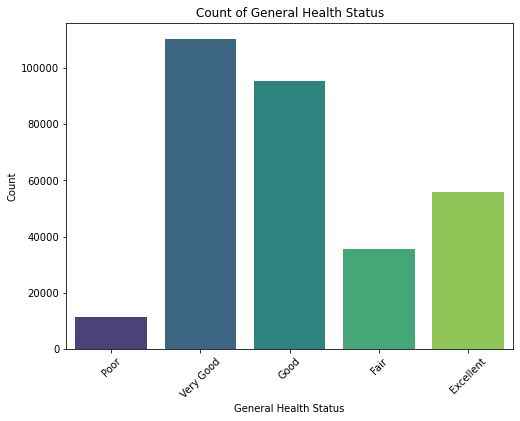

In [29]:
#Count plot for General_Health
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='General_Health', palette='viridis')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

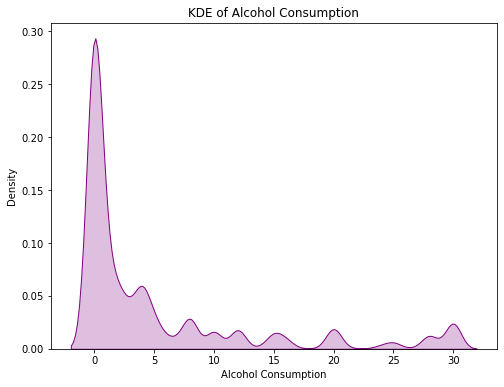

In [30]:
#Kernel Density Estimation (KDE) for Alcohol_Consumption:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Alcohol_Consumption'], shade=True, color='purple')
plt.title('KDE of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Density')
plt.show()

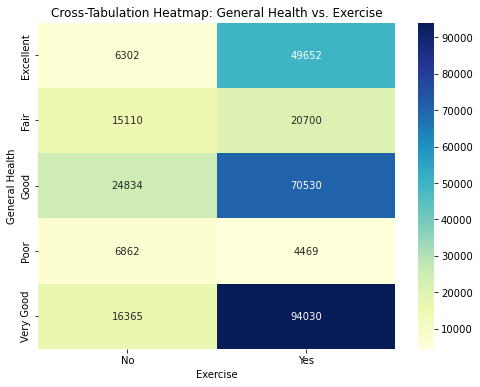

In [32]:
#General_Health and Exercise Cross-tab HeatMap
crosstab = pd.crosstab(df['General_Health'], df['Exercise'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: General Health vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('General Health')
plt.show()

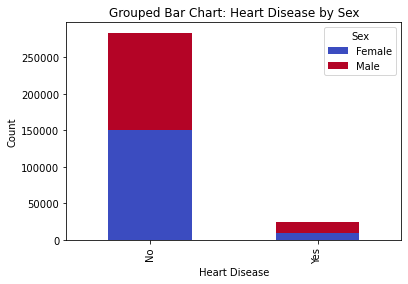

In [33]:
#Grouped Bar Chart for Hear_Disease and Sex
grouped = df.groupby(['Heart_Disease', 'Sex']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Grouped Bar Chart: Heart Disease by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

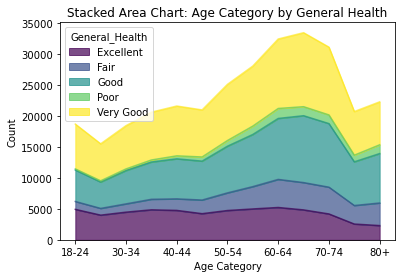

In [35]:
#Stacked Area Chart Age_Category by General_Health.
crosstab = pd.crosstab(df['Age_Category'], df['General_Health'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

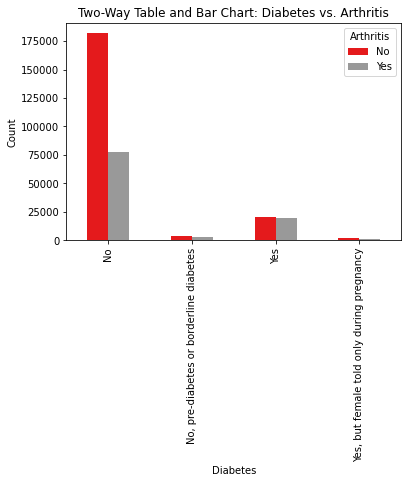

In [36]:
#Diabetes and Arthritis
table = pd.crosstab(df['Diabetes'], df['Arthritis'])
table.plot(kind='bar', colormap='Set1')
plt.title('Two-Way Table and Bar Chart: Diabetes vs. Arthritis')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [37]:
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


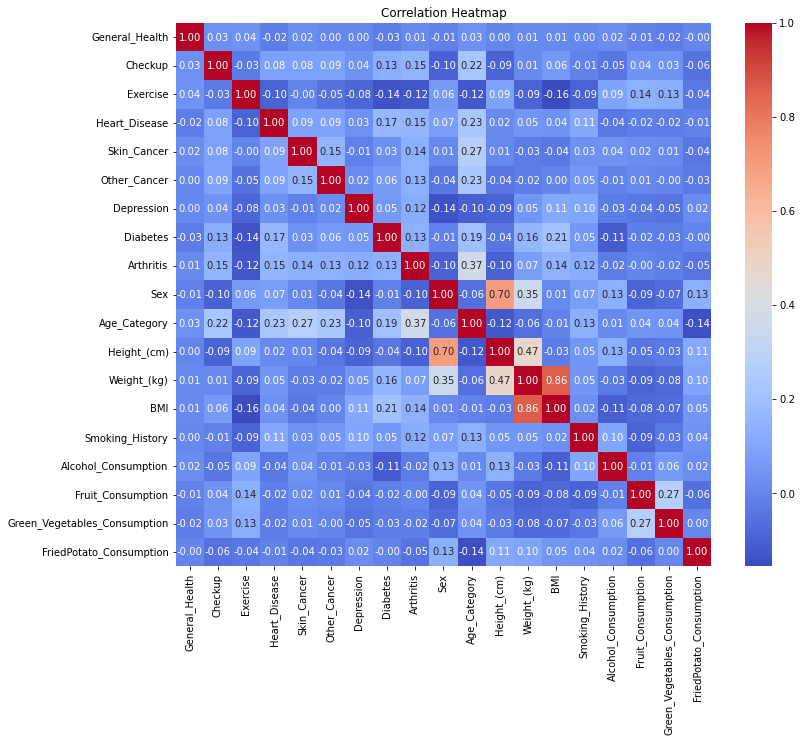

In [38]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [39]:
correlation_matrix = df.corr()
correlation_pairs = correlation_matrix.unstack()

# Sort the pairs by absolute value of the correlation in descending order
sorted_pairs = correlation_pairs.sort_values(key=lambda x: abs(x), ascending=False)

# Remove self-correlations (where variables are paired with themselves)
filtered_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Display the top most correlated pairs
top_correlated_pairs = filtered_pairs.head(10)  # Change 10 to the number of pairs you want to view
print(top_correlated_pairs)


Weight_(kg)                   BMI                             0.859699
BMI                           Weight_(kg)                     0.859699
Weight_(kg)                   Height_(cm)                     0.472186
Height_(cm)                   Weight_(kg)                     0.472186
Green_Vegetables_Consumption  Fruit_Consumption               0.270430
Fruit_Consumption             Green_Vegetables_Consumption    0.270430
Alcohol_Consumption           Height_(cm)                     0.128835
Height_(cm)                   Alcohol_Consumption             0.128835
FriedPotato_Consumption       Height_(cm)                     0.108795
Height_(cm)                   FriedPotato_Consumption         0.108795
dtype: float64


In [40]:
X = df_encoded.drop("Heart_Disease", axis = 1)
y = df_encoded['Heart_Disease']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Define features and target variable
X = df_encoded.drop("Heart_Disease", axis=1)  # Features (all columns except 'Heart_Disease')
y = df_encoded["Heart_Disease"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

NameError: name 'SMOTE' is not defined

In [18]:
# remove outliers 
selected_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                    'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 186148


In [25]:
import statsmodels.api as sm

In [26]:
X_train_clean_sm = sm.add_constant(X_train_clean)
X_test_sm = sm.add_constant(X_test)

# Fit the model
sm_model = sm.OLS(y_train_clean, X_train_clean_sm).fit()

# Get predictions
sm_predictions = sm_model.predict(X_test_sm)

# Evaluate performance
mse = mean_squared_error(y_test, sm_predictions)
mae = mean_absolute_error(y_test, sm_predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Print the summary
print(sm_model.summary())

MSE: 0.18110384017868705
MAE: 0.3582047731728865
                            OLS Regression Results                            
Dep. Variable:          Heart_Disease   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     7138.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:15:34   Log-Likelihood:            -1.4180e+05
No. Observations:              268064   AIC:                         2.836e+05
Df Residuals:                  268045   BIC:                         2.838e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Optimization terminated successfully.
         Current function value: 0.501393
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               268064
Model:                          Logit   Df Residuals:                   268045
Method:                           MLE   Df Model:                           18
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                  0.2756
Time:                        16:16:27   Log-Likelihood:            -1.3441e+05
converged:                       True   LL-Null:                   -1.8553e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.5045      0.428    -15.204      0.000

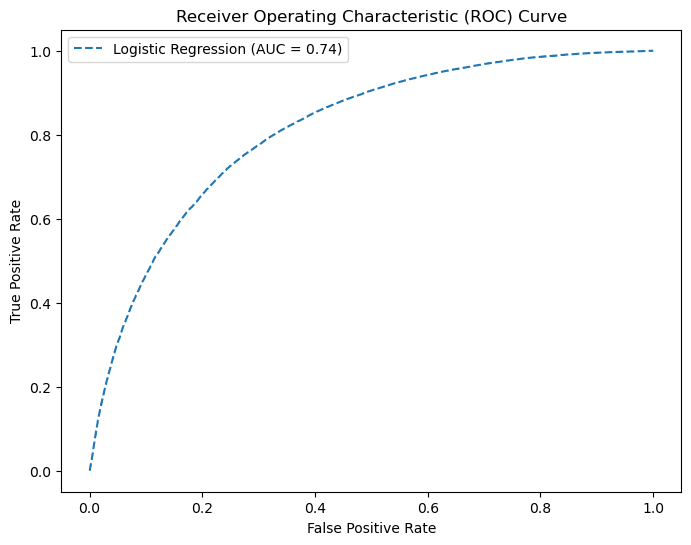

In [27]:

# Add a constant to the feature set (intercept term)
X_train_clean_sm = sm.add_constant(X_train_clean)
X_test_clean_sm = sm.add_constant(X_test)

# Fit the Logistic Regression model using statsmodels
sm_logistic_model = sm.Logit(y_train_clean, X_train_clean_sm).fit()

# Print the summary
print(sm_logistic_model.summary())

# Make predictions on the test set
sm_logistic_predictions = (sm_logistic_model.predict(X_test_clean_sm) >= 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, sm_logistic_predictions)
logistic_auc = roc_auc_score(y_test, sm_logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, sm_logistic_model.predict(X_test_clean_sm))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logistic_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
